<a href="https://colab.research.google.com/github/ElizavetaKasapen/Pneumonia_detection/blob/main/Pneumonia_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np 
import pandas as pd
import torch
import os
import zipfile

In [ ]:
#unpacking dataset
zip_path = '/content/drive/MyDrive/Pneumonia/Pneumonia_data.zip'
folder_path = '/content/drive/MyDrive/Pneumonia/Pneumonia_data'
with zipfile.ZipFile(zip_path, 'r') as zip_obj:
   zip_obj.extractall(folder_path)

In [ ]:
#creating validation set
train_dir = '/content/drive/MyDrive/Pneumonia/Pneumonia_data/data/train'
val_dir = '/content/drive/MyDrive/Pneumonia/Pneumonia_data/data/validation'
class_names = ['BAC_PNEUMONIA', 'NORMAL','VIR_PNEUMONIA']

In [ ]:
#create validation folder with subfolders
for dir_name in [train_dir, val_dir]:
    for class_name in class_names:
        os.makedirs(os.path.join(dir_name, class_name), exist_ok=True)

In [ ]:
import shutil #operations with files and dir 
from tqdm import tqdm #progress bar

In [ ]:
#every 5 pic to the valid set
for class_name in class_names:
    source_dir = os.path.join(train_dir, class_name)
    for i, file_name in enumerate(tqdm(os.listdir(source_dir))):
        if i % 5 == 0:
            dest_dir = os.path.join(val_dir, class_name)
            shutil.move(os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))

100%|██████████| 1384/1384 [00:01<00:00, 880.49it/s]


In [ ]:
def show_count_of_files(path):
  return len([f for f in os.listdir(path)
                if os.path.isfile(os.path.join(path, f))])

In [ ]:
path_to_show = '/content/drive/MyDrive/Pneumonia/Pneumonia_data/data/'  
print("test:\n\t"+'Bac: '+str(show_count_of_files(path_to_show+'test/BAC_PNEUMONIA')) 
      + '\tNorm: ' +str(show_count_of_files(path_to_show+'test/NORMAL'))
      + '\tVir: ' + str(show_count_of_files(path_to_show+'test/VIR_PNEUMONIA'))
      + '\ntrain:\n\tBac: '  +str(show_count_of_files(path_to_show+'train/BAC_PNEUMONIA')) 
      + '\tNorm: ' +str(show_count_of_files(path_to_show+'train/NORMAL'))
      + '\tVir: ' + str(show_count_of_files(path_to_show+'train/VIR_PNEUMONIA'))
      + '\nvalidation:\n\tBac: '  +str(show_count_of_files(path_to_show+'validation/BAC_PNEUMONIA')) 
      + '\tNorm: ' +str(show_count_of_files(path_to_show+'validation/NORMAL'))
      + '\tVir: ' + str(show_count_of_files(path_to_show+'validation/VIR_PNEUMONIA'))

)

test:
	Bac: 100	Norm: 100	Vir: 100
train:
	Bac: 1107	Norm: 1104	Vir: 1107
validation:
	Bac: 277	Norm: 276	Vir: 277


In [ ]:
import torchvision
from torchvision import transforms, models

In [ ]:
    #Transform images for resnet (just the type of transformation for imagefolder)
data_to_tranform = transforms.Compose([
  transforms.Resize((224, 224)),
  transforms.ToTensor(),
  transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
train_dataset = torchvision.datasets.ImageFolder(train_dir, data_to_tranform)
val_dataset = torchvision.datasets.ImageFolder(val_dir, data_to_tranform)

In [ ]:
batch_size = 23 #or 12
num_workers = 4
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, drop_last = True)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, drop_last = True)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
len(train_dataloader), len(train_dataset)

(145, 3318)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#just check
X_batch, y_batch = next(iter(train_dataloader))
#to see picture (reverse operation)
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
plt.imshow(X_batch[0].permute(1, 2, 0).numpy() * std + mean);

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


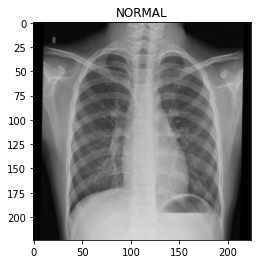

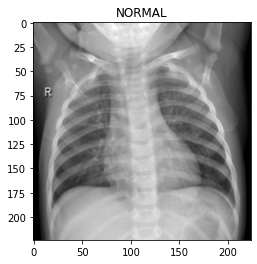

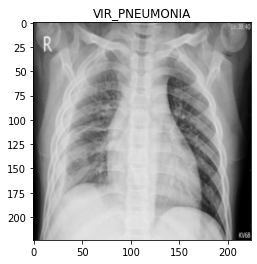

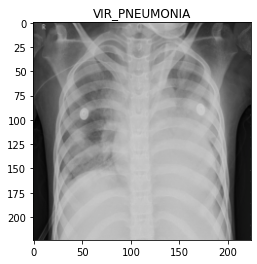

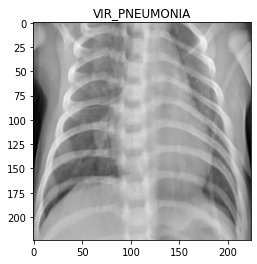

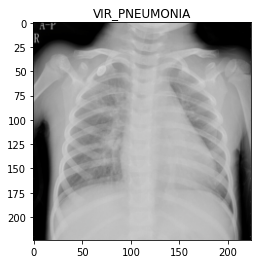

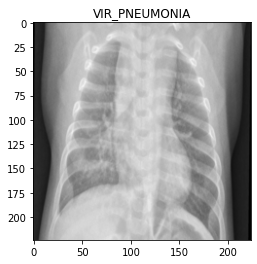

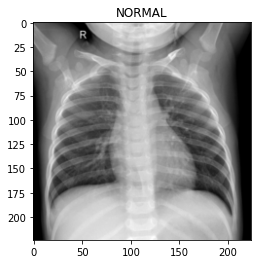

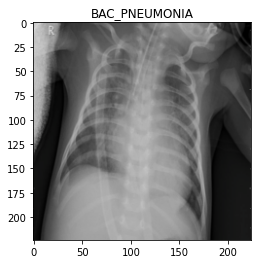

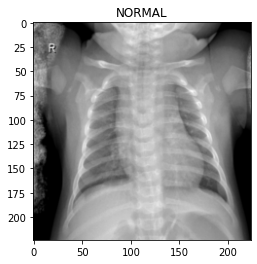

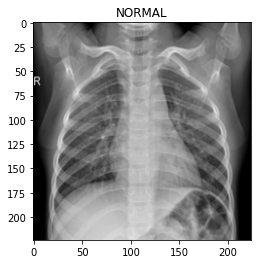

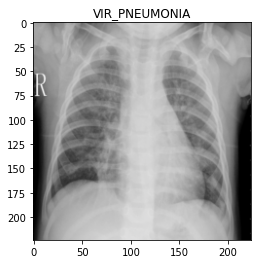

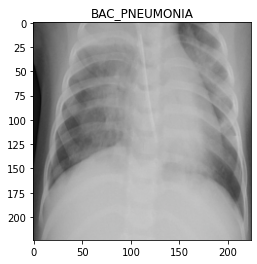

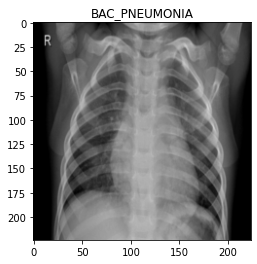

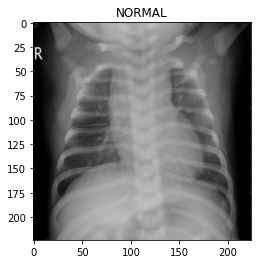

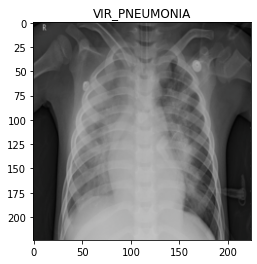

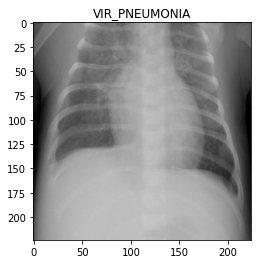

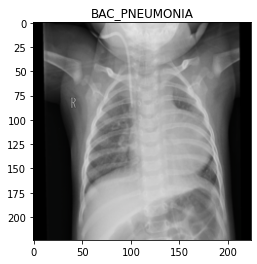

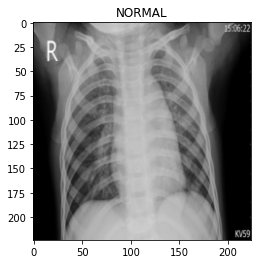

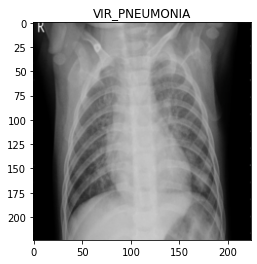

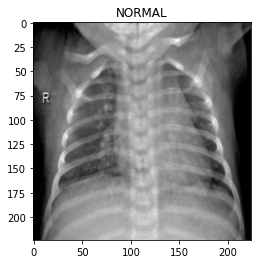

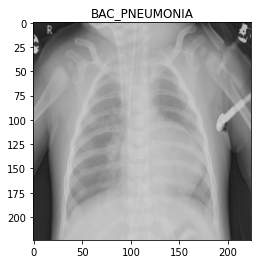

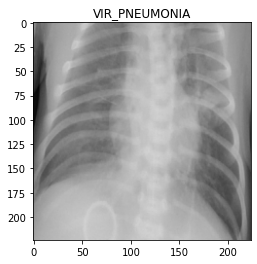

In [ ]:
#the same. just to see what happened in dataloader
def show_input(input_tensor, title=''):
    image = input_tensor.permute(1, 2, 0).numpy()
    image = std * image + mean
    plt.imshow(image.clip(0, 1))
    plt.title(title)
    plt.show()
    plt.pause(0.001)

X_batch, y_batch = next(iter(train_dataloader))

for x_item, y_item in zip(X_batch, y_batch):
    show_input(x_item, title=class_names[y_item])